<a href="https://colab.research.google.com/github/diegomarlop/LAB_IRONHACK/blob/main/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab | Customer Analysis Round 5

For this lab, we still keep using the marketing_customer_analysis.csv file that you can find in the files_for_lab folder.

###Get the data
We are using the marketing_customer_analysis.csv file.

###Dealing with the data
Already done in the round 2.

###Explore the data
Done in the round 3.

###Processing Data
(Further processing...)

1. X-y split.
2. Normalize (numerical).

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

In [3]:
def clean_headers(x):
  x.columns = [i.lower().replace(' ','_') for i in x.columns]  
  x['effective_to_date'] = pd.to_datetime(x['effective_to_date'],errors='coerce')
  return x 


In [4]:
clean_headers(data)

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,...,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2011-02-24,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2011-02-19,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2011-02-03,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2011-02-10,Employed,M,71941,...,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2011-02-12,Employed,F,21604,...,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2011-02-06,Unemployed,M,0,...,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2011-02-03,Employed,M,21941,...,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [ ]:
#data_num = data.select_dtypes(include=np.number)
#data_num

In [ ]:
#data_cat = data.select_dtypes(exclude=np.number)
#data_cat

In [5]:
#con info tambien puedo checar quienes tienen NaN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer                       9134 non-null   object        
 1   state                          9134 non-null   object        
 2   customer_lifetime_value        9134 non-null   float64       
 3   response                       9134 non-null   object        
 4   coverage                       9134 non-null   object        
 5   education                      9134 non-null   object        
 6   effective_to_date              9134 non-null   datetime64[ns]
 7   employmentstatus               9134 non-null   object        
 8   gender                         9134 non-null   object        
 9   income                         9134 non-null   int64         
 10  location_code                  9134 non-null   object        
 11  marital_status   

In [7]:
#Con
#data_num.describe()

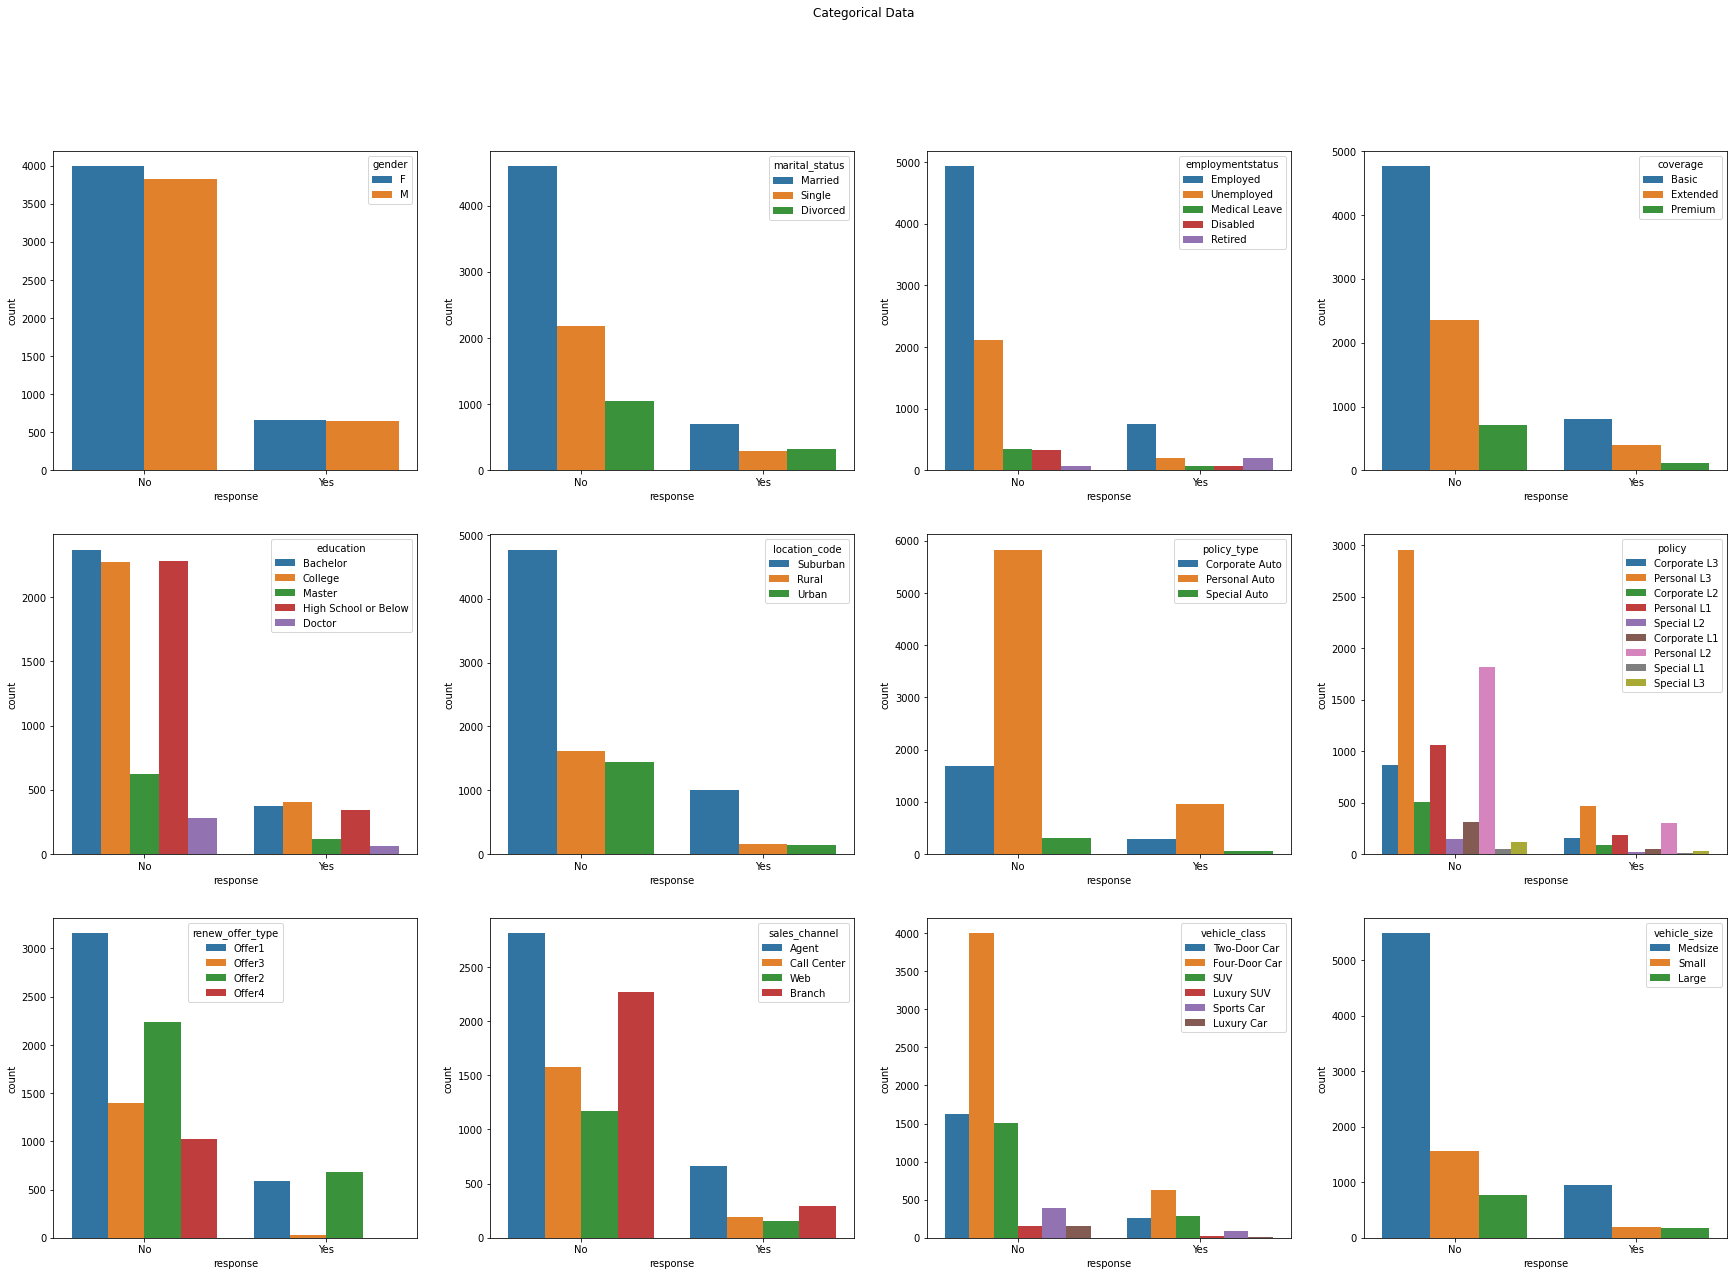

In [11]:
fig, axes = plt.subplots(3,4, figsize=(30,20))
fig.suptitle('Categorical Data')

#sns.barplot(ax=axes[0], x=bulbasaur.index, y=bulbasaur.values)
sns.countplot(ax=axes[0,0],data=data_cat,x='response',hue='gender')
sns.countplot(ax=axes[0,1],data=data_cat,x='response',hue='marital_status')
sns.countplot(ax=axes[0,2],data=data_cat,x='response',hue='employmentstatus')
sns.countplot(ax=axes[0,3],data=data_cat,x='response',hue='coverage')
sns.countplot(ax=axes[1,0],data=data_cat,x='response',hue='education')
sns.countplot(ax=axes[1,1],data=data_cat,x='response',hue='location_code')
sns.countplot(ax=axes[1,2],data=data_cat,x='response',hue='policy_type')
sns.countplot(ax=axes[1,3],data=data_cat,x='response',hue='policy')
sns.countplot(ax=axes[2,0],data=data_cat,x='response',hue='renew_offer_type')
sns.countplot(ax=axes[2,1],data=data_cat,x='response',hue='sales_channel')
sns.countplot(ax=axes[2,2],data=data_cat,x='response',hue='vehicle_class')
sns.countplot(ax=axes[2,3],data=data_cat,x='response',hue='vehicle_size')

In [8]:
#Normalize 
from scipy.spatial import transform
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler 

In [9]:
y= data['total_claim_amount']#Target/Etiqueta/Objetivo
X = data.drop('total_claim_amount',axis=1)#Features/caracteristicas

In [11]:
X_num = X.select_dtypes(include=np.number)
X_cat = X.select_dtypes(include=np.object)

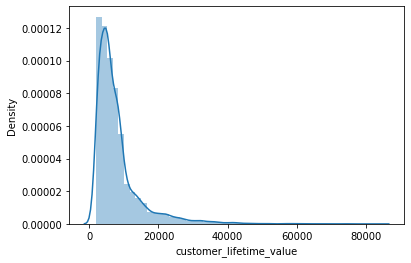

In [12]:
#ver como se ve antes de normalizar 
sns.distplot(X_num['customer_lifetime_value'])

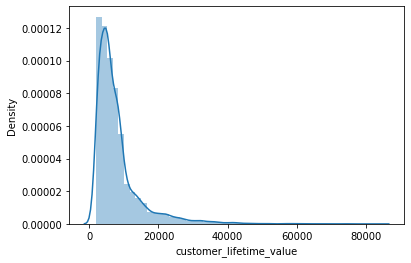

In [33]:
sns.distplot(X2_num['customer_lifetime_value'])

In [17]:
transformer=Normalizer().fit(X_num)
X_norm=transformer.transform(X_num)
X_norm_df=pd.DataFrame(X_norm)
"""
transformer=Normalizer().fit(X_num)
x_normalized=transformer.transform(X_num)
x_normalized_df=pd.DataFrame(x_normalized)
"""

'\ntransformer=Normalizer().fit(X_num)\nx_normalized=transformer.transform(X_num)\nx_normalized_df=pd.DataFrame(x_normalized)\n'

In [36]:
X_norm_df

,0,1,2,3,4,5,6
0,0.049049,0.998795,0.001225,0.000568,0.000089,0.000000,0.000018
1,0.999889,0.000000,0.013466,0.001862,0.006017,0.000000,0.001146
2,0.255494,0.966808,0.002141,0.000357,0.000753,0.000000,0.000040
3,0.999865,0.000000,0.013862,0.002354,0.008500,0.000000,0.000915
4,0.064055,0.997944,0.001662,0.000273,0.001002,0.000000,0.000023
...,...,...,...,...,...,...,...
9129,0.309387,0.950935,0.000965,0.000238,0.001176,0.000000,0.000026
9130,0.141879,0.989876,0.003620,0.000641,0.001283,0.000000,0.000046
9131,0.999935,0.000000,0.010411,0.001102,0.004532,0.000367,0.000245
9132,0.324391,0.945913,0.004139,0.001466,0.000129,0.000000,0.000129


In [ ]:
X_norm_df.iloc[:,:1]

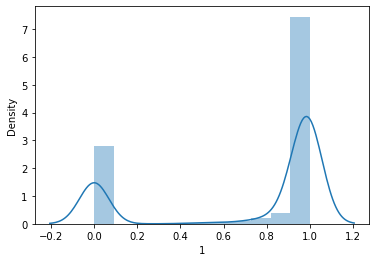

In [41]:

sns.distplot(X_norm_df.iloc[:,1])